In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,cv2

from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [2]:
PATH = os.getcwd()
data_path = PATH + '/Dataset'
data_dir_list = os.listdir(data_path)

In [3]:
num_classes = 2
labels_name = {'Processing_Not_Required':0, 'Processing_Required':1}

In [4]:
df=pd.DataFrame(columns=["path_of_image","image_raw","label"])
img_data_list = []
labels_list = []

In [5]:
a=0
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        path=data_path + '/'+ dataset + '/'+ img
        input_img=cv2.imread(path)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(np.array(input_img_resize))
        labels_list.append(np.array(label))
        df.loc[a]=[path,np.array(input_img_resize),np.array(label)]
        a+=1
df

Loading the images of dataset-Processing_Not_Required

Loading the images of dataset-Processing_Required



,path_of_image,image_raw,label
0,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
2,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
...,...,...,...
295,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[223, 236, 213], [223, 236, 213], [223, 236,...",1
296,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[242, 242, 242], [242, 242, 242], [242, 242,...",1
297,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[242, 242, 242], [242, 242, 242], [242, 242,...",1
298,C:\Users\Ash\Desktop\IBM\Invoices\Invoices/Dat...,"[[[229, 228, 230], [228, 227, 230], [229, 228,...",1


In [6]:
# var=df["image_raw"]
# for x,i in enumerate(var):
#     if i.shape[0]!=128 or i.shape[1]!=128 or i.shape[2]!=3:
#         print(i.shape,x)

In [7]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
print(img_data)

(300, 128, 128, 3)
[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         

In [8]:
labels = np.array(labels_list)
print(np.unique(labels,return_counts=True))
Y = tf.keras.utils.to_categorical(labels, num_classes)

(array([0, 1]), array([186, 114], dtype=int64))


In [9]:
x,y = shuffle(img_data,Y, random_state=2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

X_train = X_train.reshape(X_train.shape[0], 128,128,3)
X_test = X_test.reshape(X_test.shape[0], 128,128,3)

print(X_train[0])

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [11]:
model = Sequential()

model.add(Conv2D(32, 3,padding='same',input_shape=(128,128,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [12]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        1

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=2,
                    epochs=10,
                    validation_split=0.1,
                    verbose=1,
                    )

Epoch 1/10
108/108 [==============================] - 1s 11ms/step - loss: 1.0848 - accuracy: 0.6528 - val_loss: 0.6813 - val_accuracy: 0.6250
Epoch 2/10
108/108 [==============================] - 1s 9ms/step - loss: 0.6485 - accuracy: 0.6574 - val_loss: 0.6166 - val_accuracy: 0.5417
Epoch 3/10
108/108 [==============================] - 1s 8ms/step - loss: 0.5882 - accuracy: 0.7269 - val_loss: 0.5784 - val_accuracy: 0.7083
Epoch 4/10
108/108 [==============================] - 1s 8ms/step - loss: 0.5032 - accuracy: 0.7500 - val_loss: 0.6023 - val_accuracy: 0.8333
Epoch 5/10
108/108 [==============================] - 1s 8ms/step - loss: 0.4535 - accuracy: 0.7685 - val_loss: 0.5482 - val_accuracy: 0.7500
Epoch 6/10
108/108 [==============================] - 1s 8ms/step - loss: 0.4831 - accuracy: 0.8148 - val_loss: 0.4099 - val_accuracy: 0.8333
Epoch 7/10
108/108 [==============================] - 1s 8ms/step - loss: 0.3702 - accuracy: 0.8472 - val_loss: 0.3916 - val_accuracy: 0.7917
Epoch

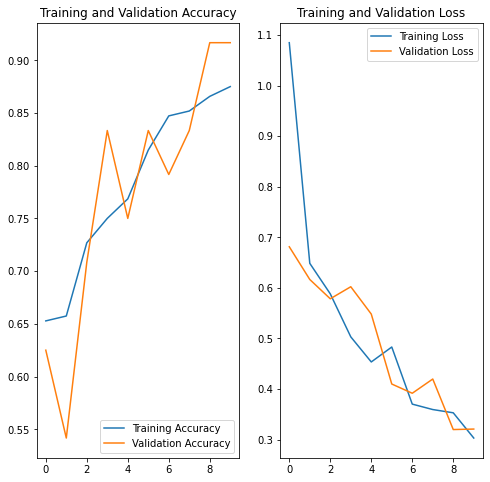

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9291666746139526
Testing Accuracy:  0.8666666746139526


In [17]:
model.save('model1.h5py')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model1.h5py\assets


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = cv2.imread(r'C:\Users\Ash\Desktop\IBM\Invoices\Invoices\inv_data\inv_data\image003.jpg')
test_image = cv2.resize(test_image,(128,128))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
model.predict(test_image)

array([[0., 1.]], dtype=float32)